# Importações

## Bibliotecas

In [64]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Dataset

In [65]:
adult = pd.read_csv("train_data.csv",sep=r'\s*,\s*',engine='python', na_values="?")

# Análise dos Dados

## Geral

**Vizualização de como são nossos dados**

In [66]:
adult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [67]:
adult.describe()

,Id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,32559.500000,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,9399.406719,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,16280.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,24419.750000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,32559.500000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,40699.250000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,48839.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [68]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              32560 non-null  int64 
 1   age             32560 non-null  int64 
 2   workclass       30724 non-null  object
 3   fnlwgt          32560 non-null  int64 
 4   education       32560 non-null  object
 5   education.num   32560 non-null  int64 
 6   marital.status  32560 non-null  object
 7   occupation      30717 non-null  object
 8   relationship    32560 non-null  object
 9   race            32560 non-null  object
 10  sex             32560 non-null  object
 11  capital.gain    32560 non-null  int64 
 12  capital.loss    32560 non-null  int64 
 13  hours.per.week  32560 non-null  int64 
 14  native.country  31977 non-null  object
 15  income          32560 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


**Análise da relação entre as features e os possíveis valores de label**

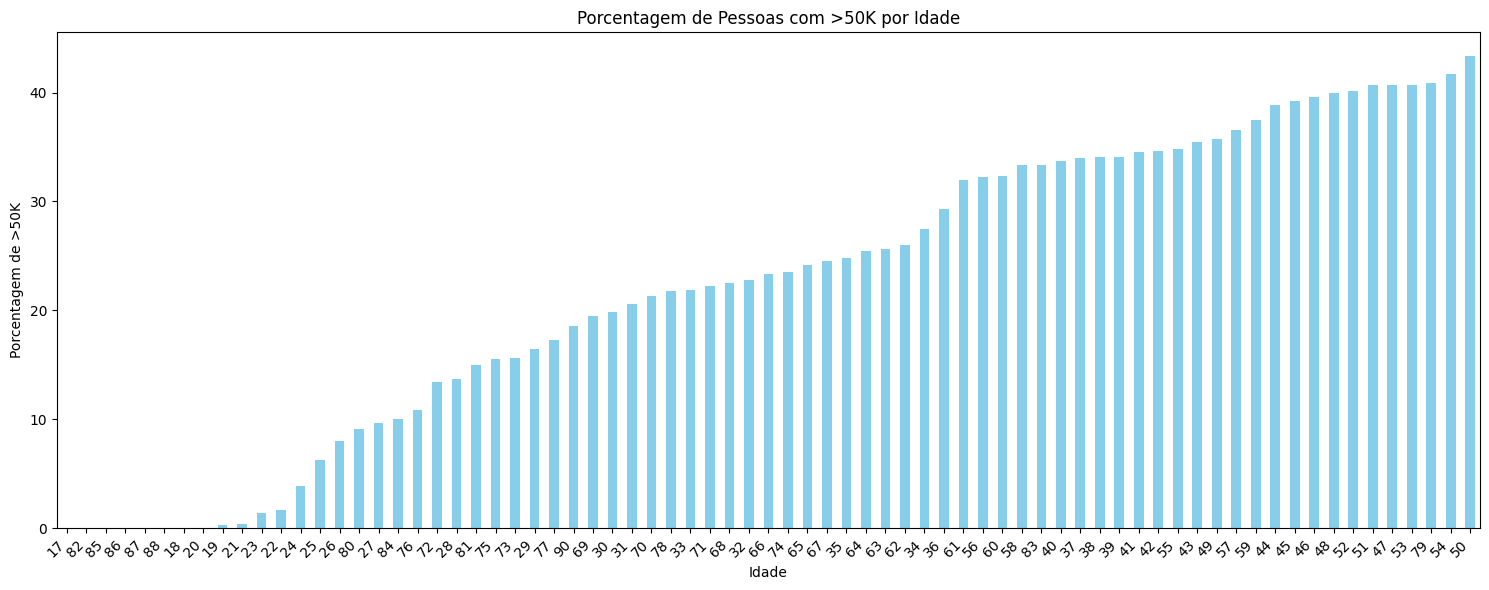

In [69]:
dados = adult.groupby('age')['income'].apply(lambda x: (x == '>50K').mean()) * 100

# Plotar o gráfico de barras
plt.figure(figsize=(15, 6))
dados.sort_values().plot(kind='bar', color='skyblue')
plt.title('Porcentagem de Pessoas com >50K por Idade')
plt.xlabel('Idade')
plt.ylabel('Porcentagem de >50K')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

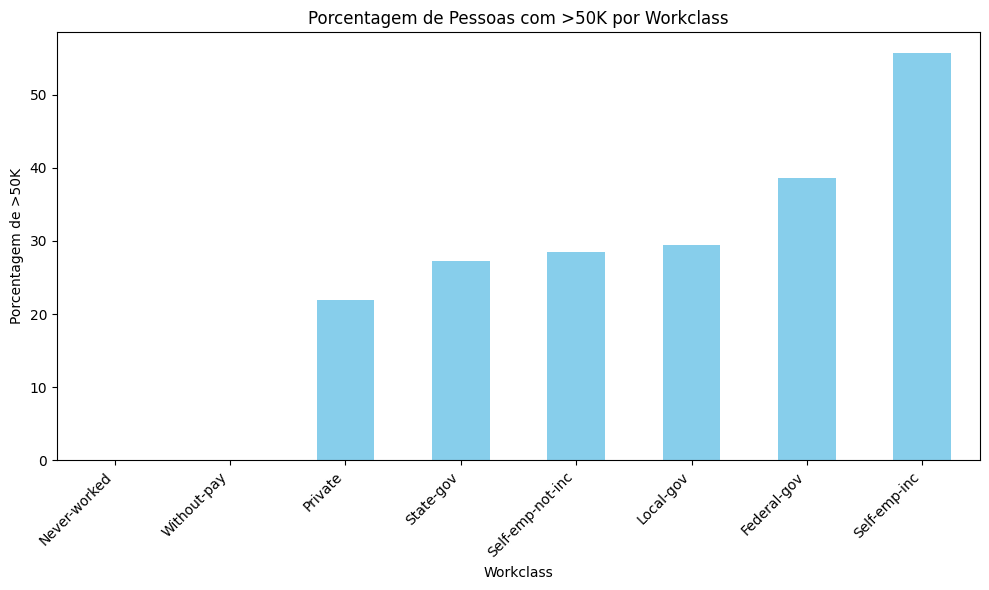

In [70]:
dados = adult.groupby('workclass')['income'].apply(lambda x: (x == '>50K').mean()) * 100

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
dados.sort_values().plot(kind='bar', color='skyblue')
plt.title('Porcentagem de Pessoas com >50K por Workclass')
plt.xlabel('Workclass')
plt.ylabel('Porcentagem de >50K')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

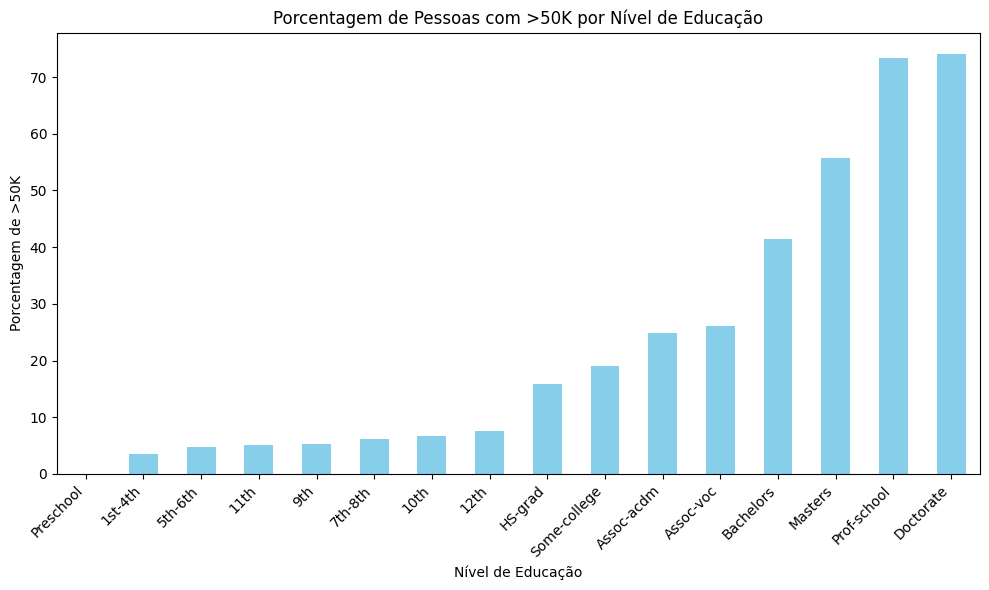

In [71]:
dados = adult.groupby('education')['income'].apply(lambda x: (x == '>50K').mean()) * 100

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
dados.sort_values().plot(kind='bar', color='skyblue')
plt.title('Porcentagem de Pessoas com >50K por Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Porcentagem de >50K')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

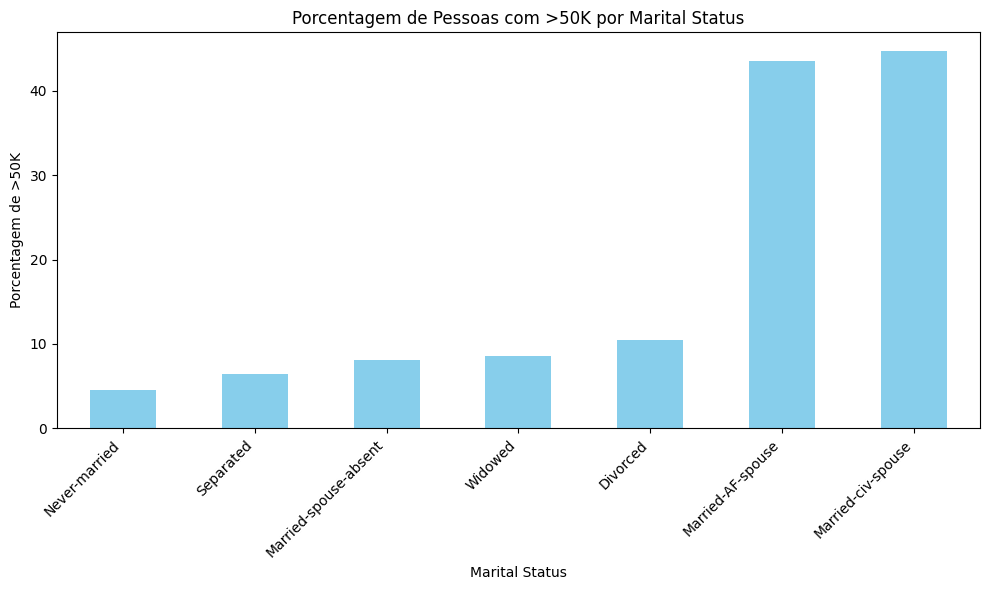

In [72]:
dados = adult.groupby('marital.status')['income'].apply(lambda x: (x == '>50K').mean()) * 100

plt.figure(figsize=(10, 6))
dados.sort_values().plot(kind='bar', color='skyblue')
plt.title('Porcentagem de Pessoas com >50K por Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Porcentagem de >50K')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

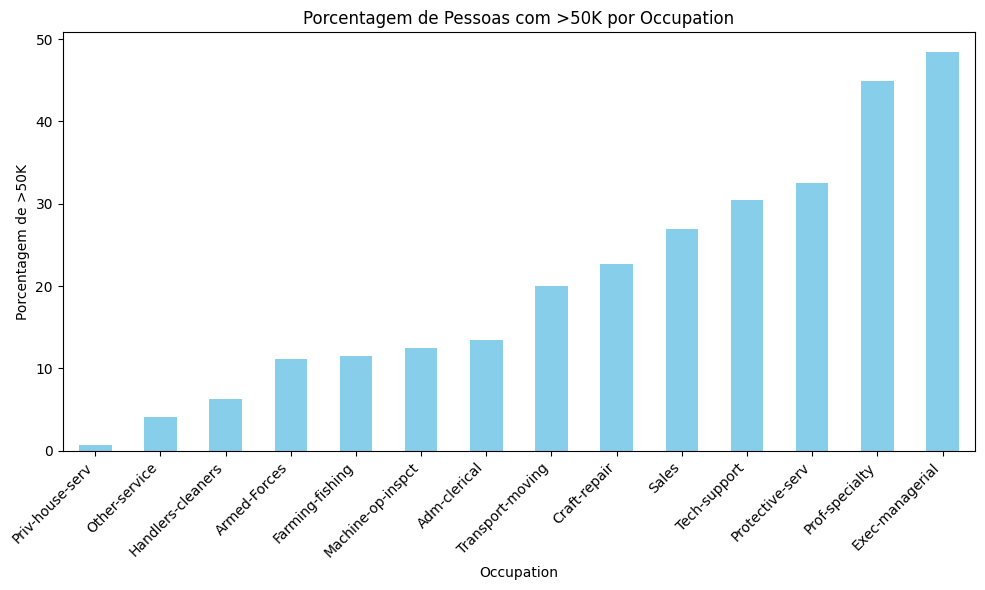

In [73]:
dados = adult.groupby('occupation')['income'].apply(lambda x: (x == '>50K').mean()) * 100

plt.figure(figsize=(10, 6))
dados.sort_values().plot(kind='bar', color='skyblue')
plt.title('Porcentagem de Pessoas com >50K por Occupation')
plt.xlabel('Occupation')
plt.ylabel('Porcentagem de >50K')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

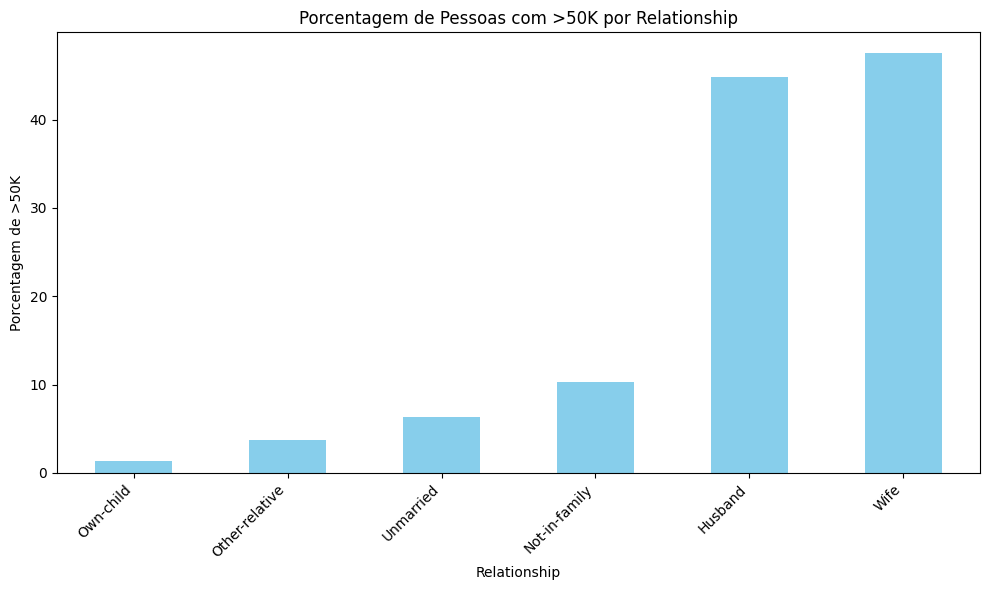

In [74]:
dados = adult.groupby('relationship')['income'].apply(lambda x: (x == '>50K').mean()) * 100

plt.figure(figsize=(10, 6))
dados.sort_values().plot(kind='bar', color='skyblue')
plt.title('Porcentagem de Pessoas com >50K por Relationship')
plt.xlabel('Relationship')
plt.ylabel('Porcentagem de >50K')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

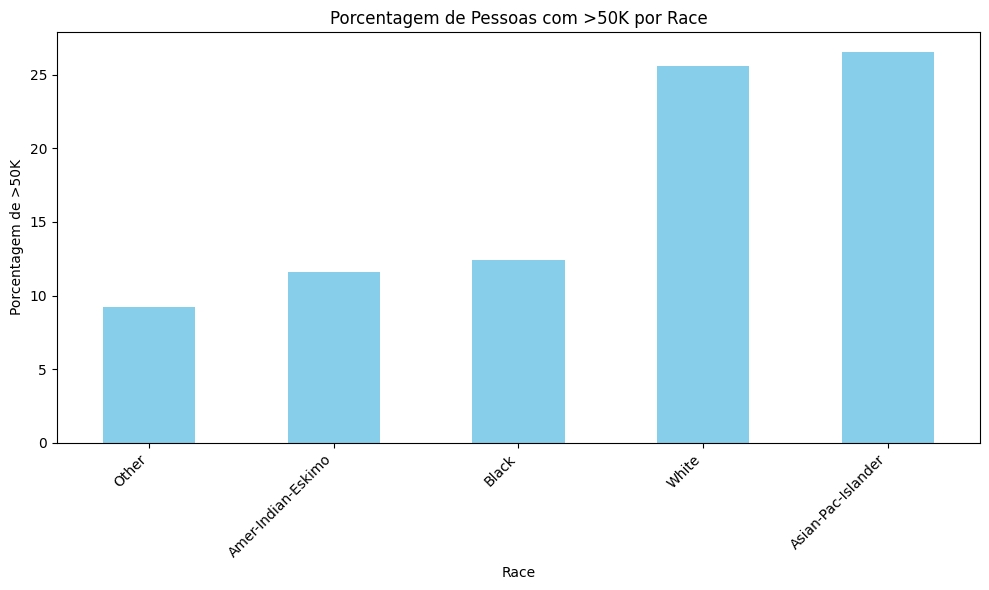

In [75]:
dados = adult.groupby('race')['income'].apply(lambda x: (x == '>50K').mean()) * 100

plt.figure(figsize=(10, 6))
dados.sort_values().plot(kind='bar', color='skyblue')
plt.title('Porcentagem de Pessoas com >50K por Race')
plt.xlabel('Race')
plt.ylabel('Porcentagem de >50K')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

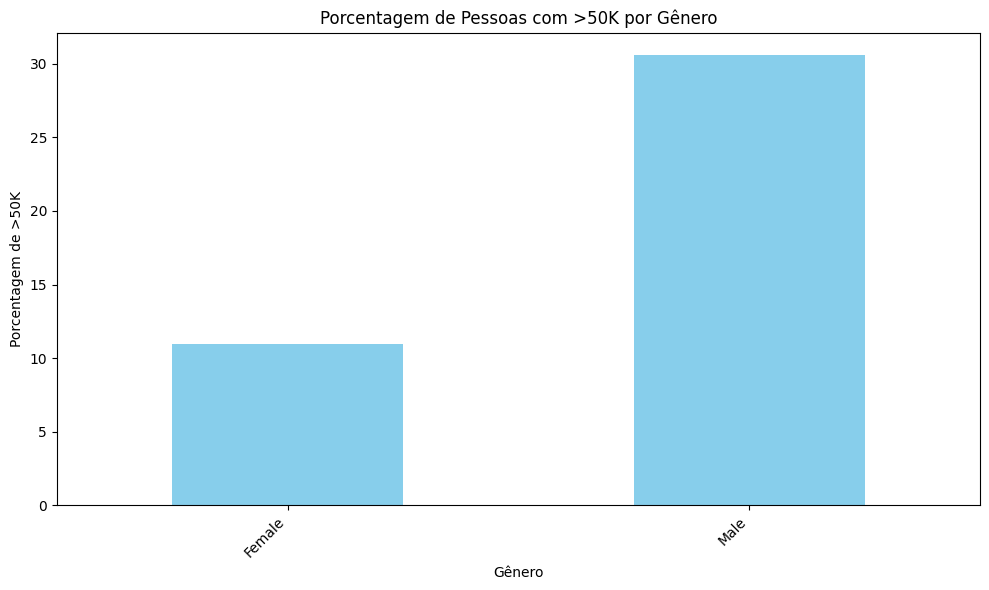

In [76]:
dados = adult.groupby('sex')['income'].apply(lambda x: (x == '>50K').mean()) * 100

plt.figure(figsize=(10, 6))
dados.sort_values().plot(kind='bar', color='skyblue')
plt.title('Porcentagem de Pessoas com >50K por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Porcentagem de >50K')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

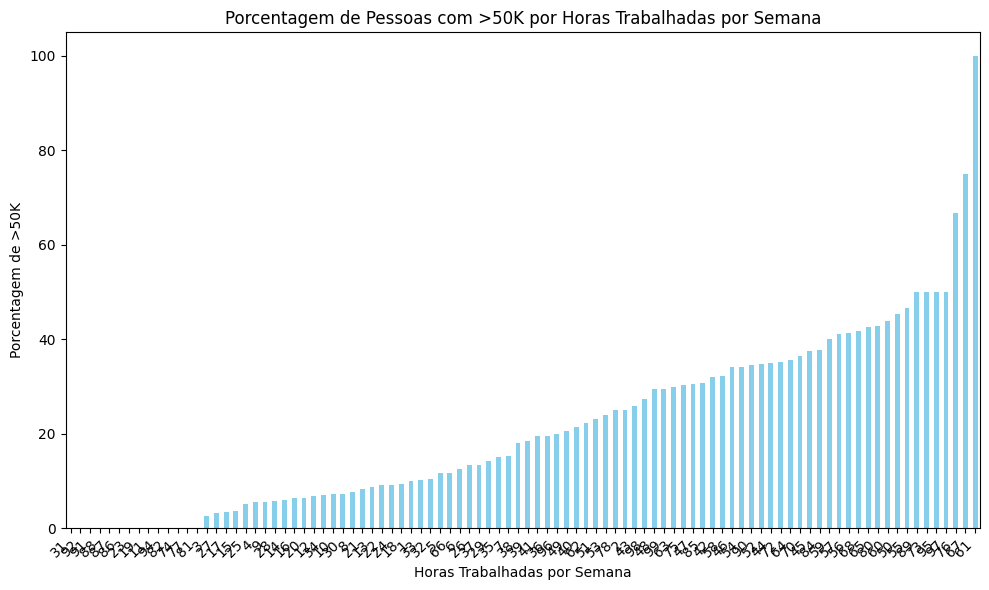

In [77]:
dados = adult.groupby('hours.per.week')['income'].apply(lambda x: (x == '>50K').mean()) * 100

plt.figure(figsize=(10, 6))
dados.sort_values().plot(kind='bar', color='skyblue')
plt.title('Porcentagem de Pessoas com >50K por Horas Trabalhadas por Semana')
plt.xlabel('Horas Trabalhadas por Semana')
plt.ylabel('Porcentagem de >50K')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

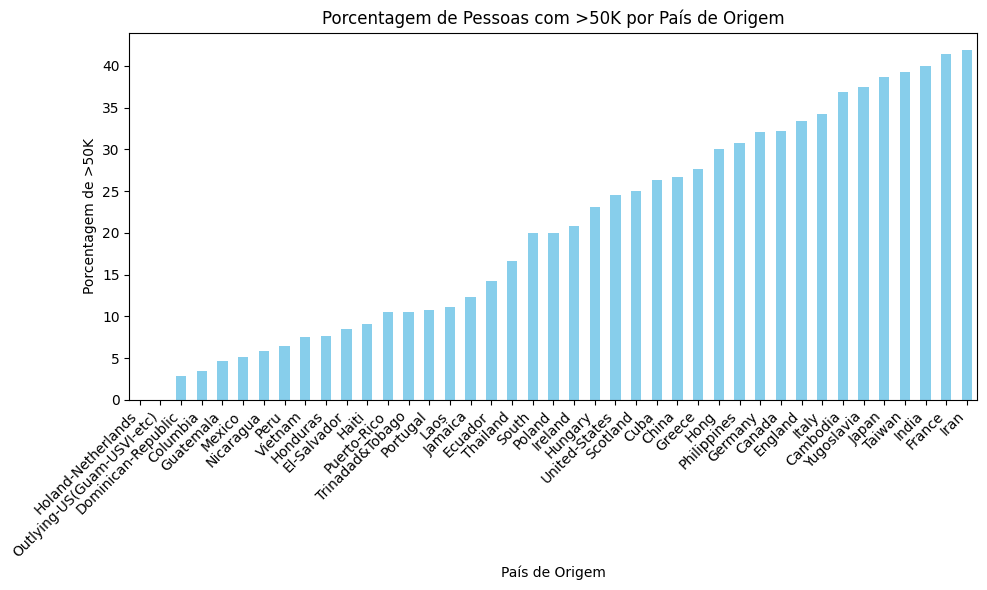

In [78]:
dados = adult.groupby('native.country')['income'].apply(lambda x: (x == '>50K').mean()) * 100

plt.figure(figsize=(10, 6))
dados.sort_values().plot(kind='bar', color='skyblue')
plt.title('Porcentagem de Pessoas com >50K por País de Origem')
plt.xlabel('País de Origem')
plt.ylabel('Porcentagem de >50K')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Análise das variáveis categóricas para futura codificação delas**

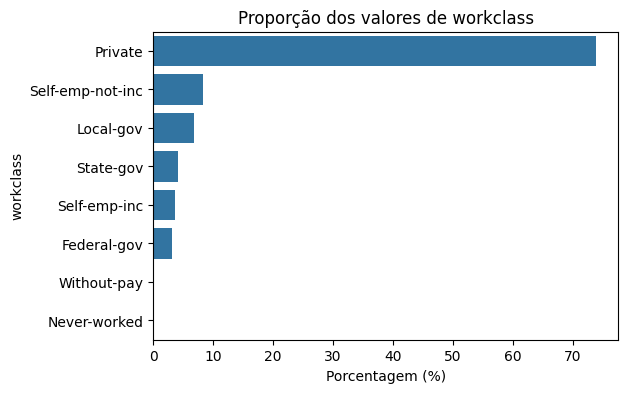

In [79]:
porcentagens = adult['workclass'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(y=porcentagens.index, x=porcentagens.values)
plt.title('Proporção dos valores de workclass')
plt.xlabel('Porcentagem (%)')
plt.ylabel('workclass')
plt.show()

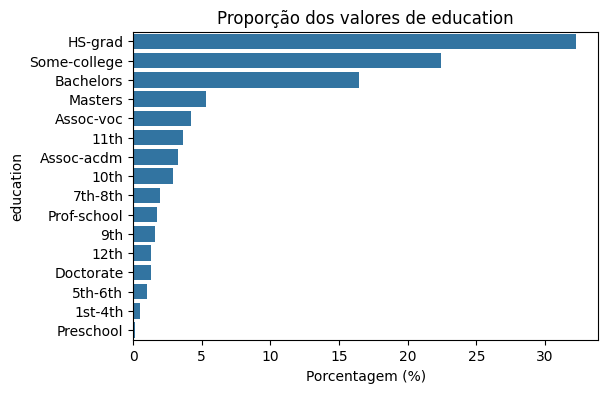

In [80]:
porcentagens = adult['education'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(y=porcentagens.index, x=porcentagens.values)
plt.title('Proporção dos valores de education')
plt.xlabel('Porcentagem (%)')
plt.ylabel('education')
plt.show()

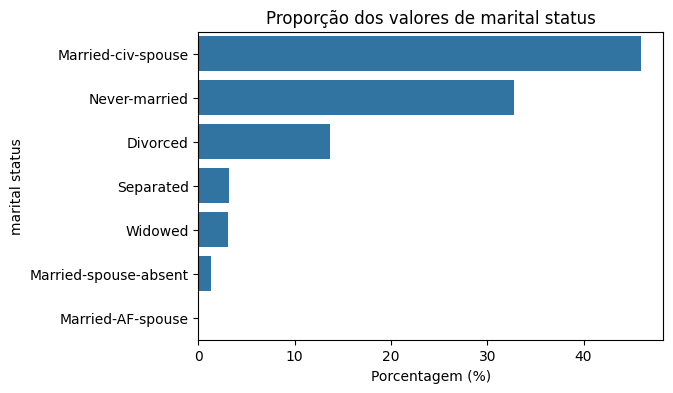

In [81]:
porcentagens = adult['marital.status'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(y=porcentagens.index, x=porcentagens.values)
plt.title('Proporção dos valores de marital status')
plt.xlabel('Porcentagem (%)')
plt.ylabel('marital status')
plt.show()

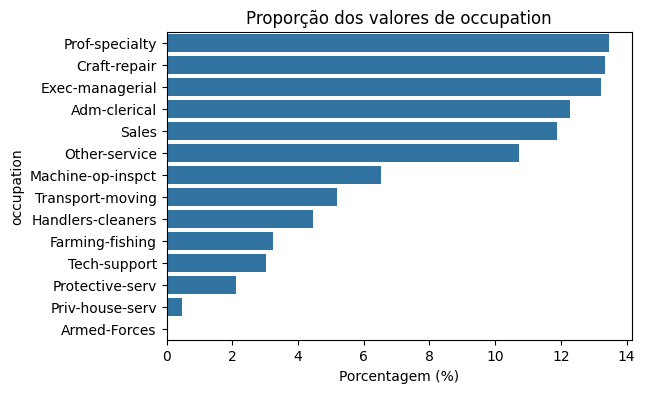

In [82]:
porcentagens = adult['occupation'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(y=porcentagens.index, x=porcentagens.values)
plt.title('Proporção dos valores de occupation')
plt.xlabel('Porcentagem (%)')
plt.ylabel('occupation')
plt.show()

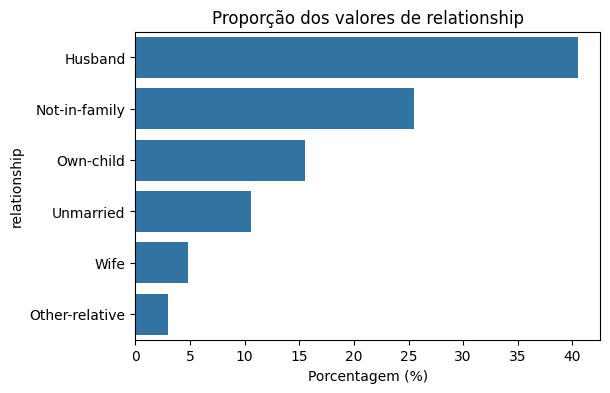

In [83]:
porcentagens = adult['relationship'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(y=porcentagens.index, x=porcentagens.values)
plt.title('Proporção dos valores de relationship')
plt.xlabel('Porcentagem (%)')
plt.ylabel('relationship')
plt.show()

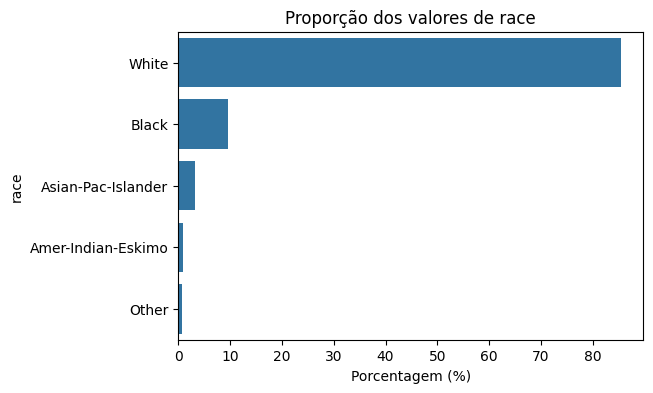

In [84]:
porcentagens = adult['race'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(y=porcentagens.index, x=porcentagens.values)
plt.title('Proporção dos valores de race')
plt.xlabel('Porcentagem (%)')
plt.ylabel('race')
plt.show()

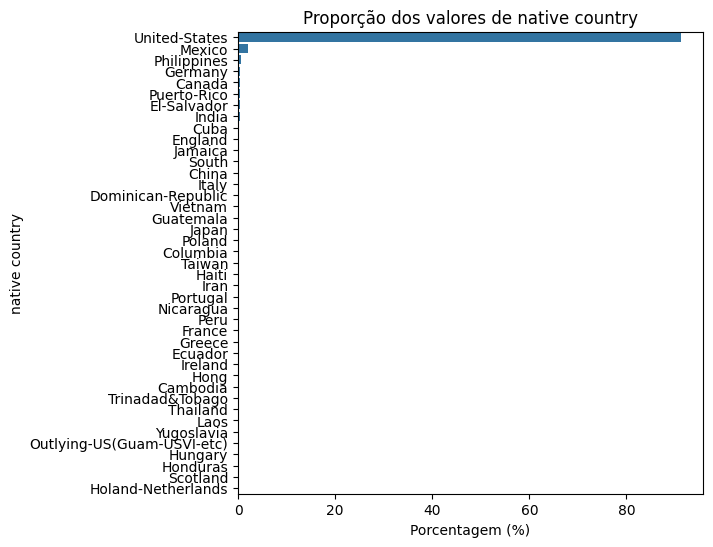

In [85]:
porcentagens = adult['native.country'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
sns.barplot(y=porcentagens.index, x=porcentagens.values)
plt.title('Proporção dos valores de native country')
plt.xlabel('Porcentagem (%)')
plt.ylabel('native country')
plt.show()

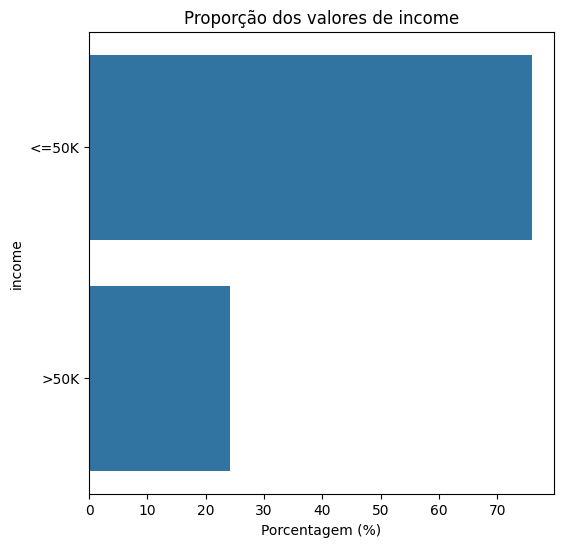

In [86]:
porcentagens = adult['income'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
sns.barplot(y=porcentagens.index, x=porcentagens.values)
plt.title('Proporção dos valores de income')
plt.xlabel('Porcentagem (%)')
plt.ylabel('income')
plt.show()

In [87]:
porcentagens

income
<=50K    75.918305
>50K     24.081695
Name: proportion, dtype: float64

Analisando nossas features categóricas podemos ver uma péssima distribuição nas colunas "workclass", "race" e "native.country", além de um desbalanceamento da nossa label, possuindo muito mais dados de pessoas que recebem menos de 50k.

## Análise de dados faltantes

Número de linhas com pelo menos um valor faltante: 2399


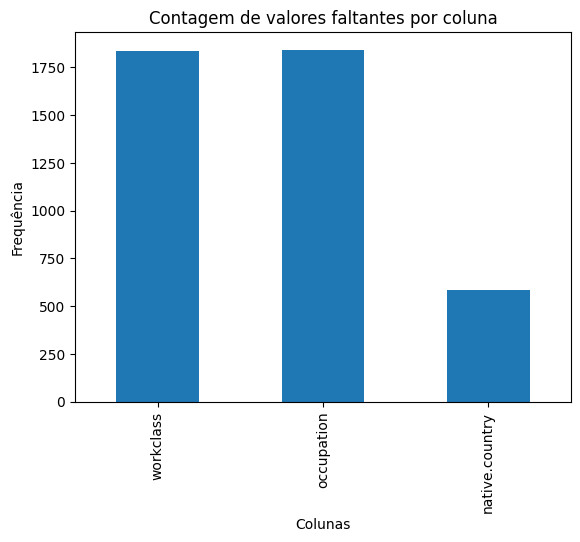

In [88]:
contagem_nan = adult.isnull().sum()

contagem_nan = contagem_nan[contagem_nan > 0]

linhas_com_nan = adult.isnull().any(axis=1).sum()

print(f'Número de linhas com pelo menos um valor faltante: {linhas_com_nan}')

contagem_nan.plot(kind='bar')
plt.title('Contagem de valores faltantes por coluna')
plt.xlabel('Colunas')
plt.ylabel('Frequência')
plt.show()

Com relação aos dados faltantes, podemos ver que eles estão presentes em apenas 3 labels, totalizando 2399 linhas.

# Transformação dos Dados

# Encoding

Para podermos trabalhar melhor com os dados, mapearemos temporariamente as variáveis categóricas para numéricas

Como analisado nos gráficos, as features "workclass", "race" e "native.country" são muito desbalanceadas, portanto iremos dividí-las em menos valores para mapear

In [89]:
adult['native.country'] = adult['native.country'].apply(lambda x: 'United-States' if x == 'United-States' else 'Other')
adult['workclass'] = adult['workclass'].apply(lambda x: 'Private' if x == 'Private' else 'Other')
adult['race'] = adult['race'].apply(lambda x: 'White' if x == 'White' else 'Other')

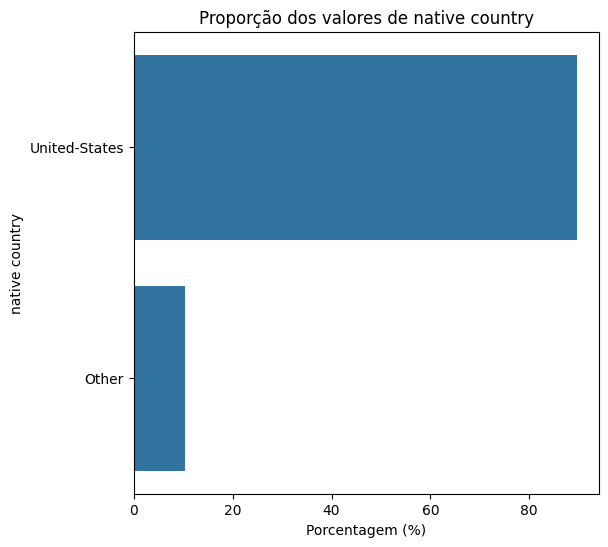

In [90]:
porcentagens = adult['native.country'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
sns.barplot(y=porcentagens.index, x=porcentagens.values)
plt.title('Proporção dos valores de native country')
plt.xlabel('Porcentagem (%)')
plt.ylabel('native country')
plt.show()

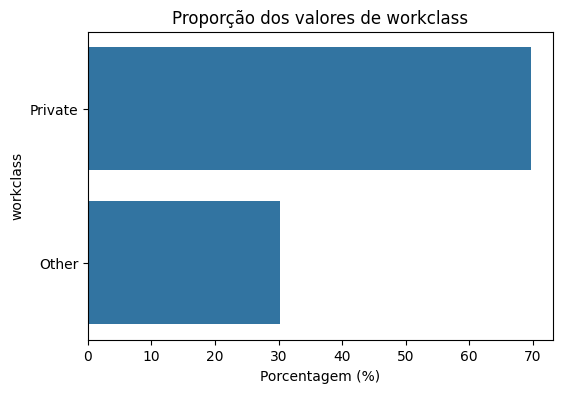

In [91]:
porcentagens = adult['workclass'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(y=porcentagens.index, x=porcentagens.values)
plt.title('Proporção dos valores de workclass')
plt.xlabel('Porcentagem (%)')
plt.ylabel('workclass')
plt.show()

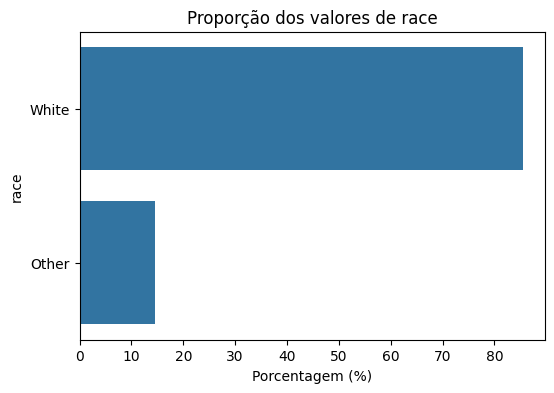

In [92]:
porcentagens = adult['race'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(y=porcentagens.index, x=porcentagens.values)
plt.title('Proporção dos valores de race')
plt.xlabel('Porcentagem (%)')
plt.ylabel('race')
plt.show()

## Correlação entre as colunas

Iremos medir a correlação entre as colunas dos nossos dados visando uma possível remoção futura de colunas redundantes ou que não contribuem muito para a análise do "income".

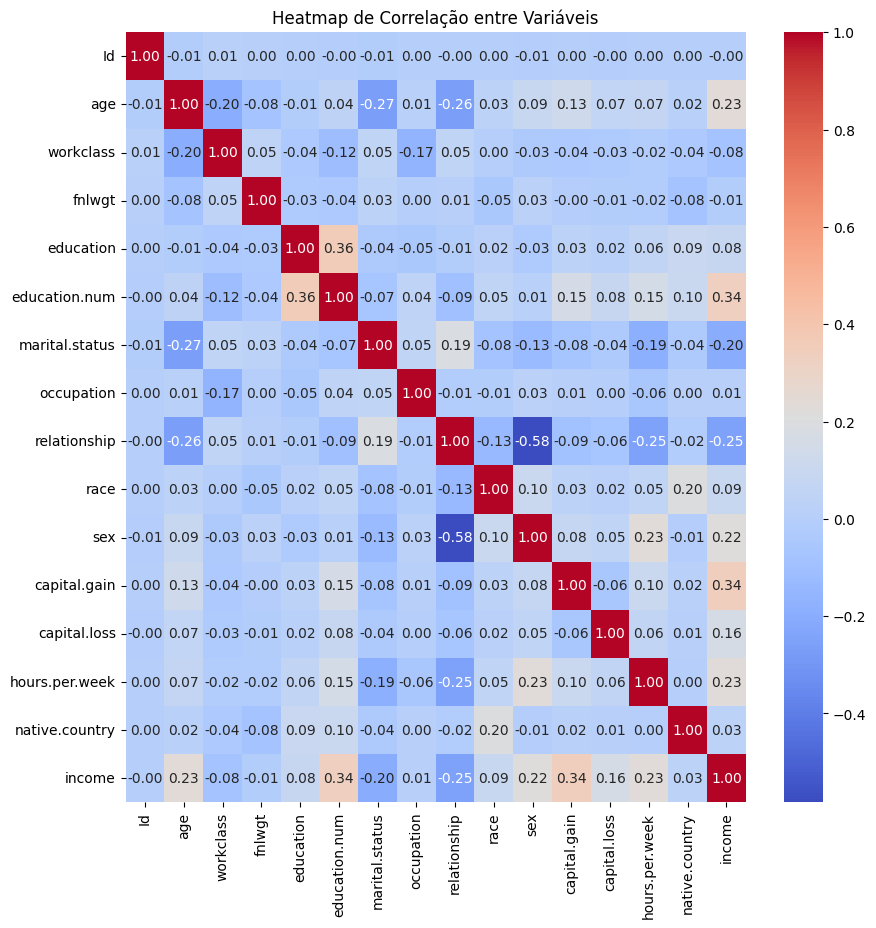

In [93]:
adult_num = adult.apply(preprocessing.LabelEncoder().fit_transform)

correlacao = adult_num.corr()

scaler = StandardScaler()
variaveis_numericas = adult_num.columns
adult_scaled = adult_num.copy()
adult_scaled[variaveis_numericas] = scaler.fit_transform(adult_num[variaveis_numericas])

plt.figure(figsize=(10, 10))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlação entre Variáveis')
plt.show()

Vendo nossas correlações, podemos ver que as features numéricas "Id", "fnlwgt" e "native.country" possuem baixos valores em relação ao "income", podendo talvez serem descartadas. Também podemos ver que as features "education" e "education.num", assim como "sex" e "relationship" possuem alta correlação, podendo ser considerado deixar apenas uma de cada dupla.

# Manipulação dos Dados

As decisões feitas foram:

- Retirar as linhas com valores faltantes ao invés das colunas;
- Remover as features com baixa Correlação com nossa Label;
- Remover feature ambígua (relationship);
- Manter o desbalanceamento de "income" nos dados de treino;
- Codificar algumas features para reduzir o número de valores;
- One-hot-Encoding nas features "Race" e "Occupation"



In [94]:
adult_train = pd.read_csv("train_data.csv",sep=r'\s*,\s*',engine='python', na_values="?")
adult_train.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


**Retirando as linhas com valores faltantes e removendo colunas indesejadas**

In [95]:
adult_train = adult_train.dropna()
adult_train = adult_train.drop(['Id','fnlwgt' ,'education','relationship','native.country'], axis=1)

adult_train.head()

,age,workclass,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,income
0,34,Private,10,Divorced,Exec-managerial,White,Male,0,0,44,<=50K
1,58,Local-gov,6,Married-civ-spouse,Transport-moving,White,Male,0,0,40,<=50K
2,25,Private,10,Never-married,Machine-op-inspct,White,Male,0,0,42,<=50K
3,24,Private,10,Divorced,Adm-clerical,White,Female,0,0,40,<=50K
4,57,Self-emp-inc,9,Married-civ-spouse,Transport-moving,White,Male,5178,0,60,>50K


**Codificação das variáveis categóricas, sendo optado one-hot-encoding nas colunas "race" e "occupation"**

In [96]:
from sklearn.preprocessing import LabelEncoder

#WORKCLASS

nao_recebe = ['Never-worked','Without-pay']
adult_train['workclass'] = adult_train['workclass'].apply(lambda x: '0' if x in nao_recebe else '1')

#MARITAL STATUS

casado = ['Married-AF-spouse','Married-civ-spouse']
adult_train['marital.status'] = adult_train['marital.status'].apply(lambda x: '1' if x in casado else '0')

#RESTO

adult_train['income'] = adult_train['income'].apply(lambda x: '0' if x=='<=50K' else '1')
adult_train['sex'] = adult_train['sex'].apply(lambda x: '0' if x=='Female' else '1')

#ONE-HOT-ENCODING

adult_train_encoded = pd.get_dummies(adult_train, columns=['race','occupation'])


adult_train_encoded.head()

,age,workclass,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income,race_Amer-Indian-Eskimo,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,34,1,10,0,1,0,0,44,0,False,...,False,False,False,False,False,False,False,False,False,False
1,58,1,6,1,1,0,0,40,0,False,...,False,False,False,False,False,False,False,False,False,True
2,25,1,10,0,1,0,0,42,0,False,...,False,False,True,False,False,False,False,False,False,False
3,24,1,10,0,0,0,0,40,0,False,...,False,False,False,False,False,False,False,False,False,False
4,57,1,9,1,1,5178,0,60,1,False,...,False,False,False,False,False,False,False,False,False,True


In [97]:
colunas_numericas = ['age', 'capital.gain','capital.loss','education.num','hours.per.week']

adult_train_encoded = adult_train_encoded.apply(
    lambda col: preprocessing.LabelEncoder().fit_transform(col) if col.name not in colunas_numericas else col
)

adult_train_encoded.head()

,age,workclass,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income,race_Amer-Indian-Eskimo,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,34,1,10,0,1,0,0,44,0,0,...,0,0,0,0,0,0,0,0,0,0
1,58,1,6,1,1,0,0,40,0,0,...,0,0,0,0,0,0,0,0,0,1
2,25,1,10,0,1,0,0,42,0,0,...,0,0,1,0,0,0,0,0,0,0
3,24,1,10,0,0,0,0,40,0,0,...,0,0,0,0,0,0,0,0,0,0
4,57,1,9,1,1,5178,0,60,1,0,...,0,0,0,0,0,0,0,0,0,1


In [98]:
adult_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30161 entries, 0 to 32559
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           30161 non-null  int64
 1   workclass                     30161 non-null  int32
 2   education.num                 30161 non-null  int64
 3   marital.status                30161 non-null  int32
 4   sex                           30161 non-null  int32
 5   capital.gain                  30161 non-null  int64
 6   capital.loss                  30161 non-null  int64
 7   hours.per.week                30161 non-null  int64
 8   income                        30161 non-null  int32
 9   race_Amer-Indian-Eskimo       30161 non-null  int64
 10  race_Asian-Pac-Islander       30161 non-null  int64
 11  race_Black                    30161 non-null  int64
 12  race_Other                    30161 non-null  int64
 13  race_White                    30161 

# **Preparando os dados de teste**

In [99]:
adult_test = pd.read_csv("test_data.csv",sep=r'\s*,\s*',engine='python', na_values="?")

adult_test.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,United-States
1,1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
3,3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
4,4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States


In [100]:
id_list = adult_test['Id']
adult_test = adult_test.drop(['Id', 'fnlwgt', 'education','relationship','native.country'], axis=1)

In [101]:
adult_test['workclass'] = adult_test['workclass'].apply(lambda x: '0' if x in nao_recebe else '1')

adult_test['marital.status'] = adult_test['marital.status'].apply(lambda x: '1' if x in casado else '0')

adult_test['sex'] = adult_test['sex'].apply(lambda x: '0' if x=='Female' else '1')

adult_test_encoded = pd.get_dummies(adult_test, columns=['race','occupation'])

adult_test_encoded = adult_test_encoded.apply(
    lambda col: preprocessing.LabelEncoder().fit_transform(col) if col.name not in colunas_numericas else col
)

adult_test_encoded.head()

,age,workclass,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,1,13,0,1,0,0,44,0,0,...,0,0,0,0,0,1,0,0,0,0
1,64,1,13,1,1,0,0,45,0,0,...,0,0,0,0,0,0,0,0,0,0
2,31,1,14,0,0,0,0,40,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45,1,9,0,1,0,0,40,0,0,...,0,0,1,0,0,0,0,0,0,0
4,64,1,13,1,1,0,0,50,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
adult_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           16280 non-null  int64
 1   workclass                     16280 non-null  int32
 2   education.num                 16280 non-null  int64
 3   marital.status                16280 non-null  int32
 4   sex                           16280 non-null  int32
 5   capital.gain                  16280 non-null  int64
 6   capital.loss                  16280 non-null  int64
 7   hours.per.week                16280 non-null  int64
 8   race_Amer-Indian-Eskimo       16280 non-null  int64
 9   race_Asian-Pac-Islander       16280 non-null  int64
 10  race_Black                    16280 non-null  int64
 11  race_Other                    16280 non-null  int64
 12  race_White                    16280 non-null  int64
 13  occupation_Adm-clerical       1

**Separando nossos dados de treino para poder validar nosso modelo**

In [103]:
from sklearn.model_selection import train_test_split

X = adult_train_encoded.copy()
X = X.drop(['income'], axis=1)
Y = adult_train_encoded.income

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

**Como o nosso modelo KNN é sensível aos valores, onde é calculado utilizando a distância deles, é necessário uma padronização dos nossos dados para evitar dar peso às nossas features**

In [104]:
scaler = StandardScaler()
X_train[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])
X_test[colunas_numericas] = scaler.transform(X_test[colunas_numericas])
X[colunas_numericas] = scaler.transform(X[colunas_numericas])

X

,age,workclass,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,-0.337916,1,-0.048697,0,1,-0.148500,-0.218601,0.256569,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.489466,1,-1.617417,1,1,-0.148500,-0.218601,-0.076876,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-1.023185,1,-0.048697,0,1,-0.148500,-0.218601,0.089846,0,0,...,0,0,1,0,0,0,0,0,0,0
3,-1.099326,1,-0.048697,0,0,-0.148500,-0.218601,-0.076876,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.413325,1,-0.440877,1,1,0.543049,-0.218601,1.590352,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.271211,1,1.520022,1,1,0.878273,-0.218601,-0.076876,0,0,...,0,0,0,0,0,1,0,0,0,0
32556,-1.175467,1,-0.440877,0,0,-0.148500,-0.218601,-0.076876,0,0,...,0,0,1,0,0,0,0,0,0,0
32557,-0.642480,1,-0.440877,0,0,-0.148500,-0.218601,-0.076876,0,0,...,0,0,0,0,1,0,0,0,0,0
32558,-1.556171,1,-0.440877,0,0,-0.148500,-0.218601,-1.327297,0,0,...,0,0,0,0,0,0,0,0,0,0


**Cross-Validation para seleção do nosso hiperparâmetro k**

In [105]:
k_range = range(15,31)
best_k = 0
best_acc = 0
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, Y, cv=5)
  media = np.mean(scores)
  print(f'K = {k}, Score = {media:.4f}')
  if(media > best_acc):
    best_k = k
    best_acc = media

print(f'Melhor k = {best_k}')

K = 15, Score = 0.8420
K = 16, Score = 0.8417
K = 17, Score = 0.8430
K = 18, Score = 0.8416
K = 19, Score = 0.8422
K = 20, Score = 0.8412
K = 21, Score = 0.8414
K = 22, Score = 0.8422
K = 23, Score = 0.8408
K = 24, Score = 0.8416
K = 25, Score = 0.8418
K = 26, Score = 0.8417
K = 27, Score = 0.8415
K = 28, Score = 0.8417
K = 29, Score = 0.8422
K = 30, Score = 0.8422
Melhor k = 17


**Com isso podemos utilizar nosso valor obtido com melhor média**

# **KNN**

In [106]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=17)

In [107]:
YtestPred = knn.predict(X_test)

YtestPred

array([0, 0, 0, ..., 0, 0, 1])

**Vendo as métricas obtidas pelo knn nos nossos dados de validação**

In [108]:
from sklearn.metrics import classification_report,confusion_matrix

print("\nRelatório de Classificação:")
print(classification_report(y_test, YtestPred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4556
           1       0.71      0.61      0.65      1477

    accuracy                           0.84      6033
   macro avg       0.79      0.76      0.78      6033
weighted avg       0.84      0.84      0.84      6033



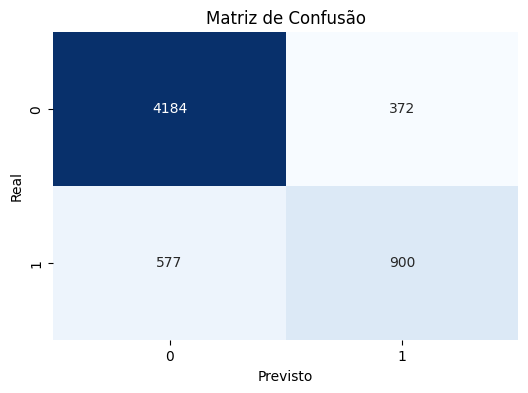

In [109]:
cm = confusion_matrix(y_test,YtestPred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


# Classification Tree

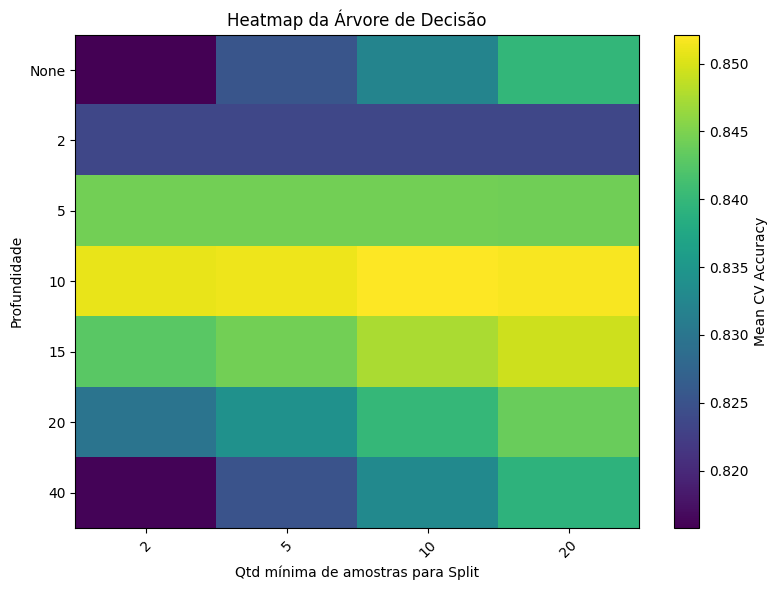

Best Parameters: {'max_depth': 10, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.8521222308351352


In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definição dos Hiperparâmetros
grid = {
    "max_depth": [None, 2, 5, 10, 15, 20, 40],
    "min_samples_split": [2, 5, 10, 20],
}

# Modelo de Árvore de Decisão
DT = DecisionTreeClassifier(random_state=123)

# Busca e otimização dos hiperparâmetros
grid_search = GridSearchCV(DT, grid, cv=5, scoring="accuracy", n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

# Vizualização dos resultados com relação à profundidade e à quantidade minima para ter um split
cv_results = pd.DataFrame(grid_search.cv_results_)

scores = cv_results.pivot(index="param_max_depth", columns="param_min_samples_split", values="mean_test_score")

plt.figure(figsize=(8, 6))
plt.imshow(scores, cmap="viridis", interpolation="nearest", aspect="auto")
plt.colorbar(label="Mean CV Accuracy")
plt.xticks(range(len(grid["min_samples_split"])), grid["min_samples_split"], rotation=45)
plt.yticks(range(len(grid["max_depth"])), ["None" if v is None else v for v in grid["max_depth"]])
plt.xlabel("Qtd mínima de amostras para Split")
plt.ylabel("Profundidade")
plt.title("Heatmap da Árvore de Decisão")
plt.tight_layout()
plt.show()

# Show the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


In [ ]:
# Treinamento do modelo de Árvore de Classificação

best_params = grid_search.best_params_
CLF = DecisionTreeClassifier(**best_params)
CLF = CLF.fit(X_train, y_train)

Ypred_CLF = CLF.predict(X_test)

Ypred_CLF

array([0, 0, 0, ..., 0, 0, 1])


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4556
           1       0.77      0.57      0.66      1477

    accuracy                           0.85      6033
   macro avg       0.82      0.76      0.78      6033
weighted avg       0.85      0.85      0.85      6033



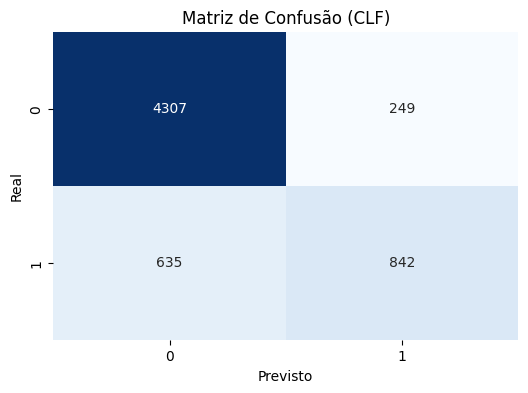

In [112]:
#Analisando as estatísticas e resultados do nosso modelo

print("\nRelatório de Classificação:")
print(classification_report(y_test, Ypred_CLF))

# Matriz de Confusão da árvore
cm = confusion_matrix(y_test,Ypred_CLF)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão (CLF)')
plt.show()

# Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

# Definição dos hiperparâmetros
param_grid = {
    "n_estimators": [50, 100, 200],  # Número de árvores
    "max_depth": [None, 10, 20, 30],  # Profundidade máxima das árvores
    "min_samples_split": [2, 5, 10],  # Número mínimo de amostras para dividir um nó
    "min_samples_leaf": [1, 2, 4],    # Número mínimo de amostras em uma folha
}

# Modelo de Floresta Aleatória
RF = RandomForestClassifier(random_state=123)

# Busca e otimização dos hiperparâmetros
grid_search_rf = GridSearchCV(RF, param_grid, cv=5, scoring="accuracy", n_jobs=-1, return_train_score=True)
grid_search_rf.fit(X_train, y_train)

# Melhor configuração obtida
print("Melhores parâmetros:", grid_search_rf.best_params_)
print("Melhor acurácia na validação cruzada:", grid_search_rf.best_score_)


Melhores parâmetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Melhor acurácia na validação cruzada: 0.8596652415993677


In [114]:
# Criando e Testando nosso modelo nos dados de treino

RF = RandomForestClassifier(**grid_search_rf.best_params_, random_state=123)
RF.fit(X_train, y_train)


Ypred_RF = RF.predict(X_test)

RF

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=200,
                       random_state=123)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4556
           1       0.78      0.61      0.68      1477

    accuracy                           0.86      6033
   macro avg       0.83      0.78      0.80      6033
weighted avg       0.86      0.86      0.85      6033



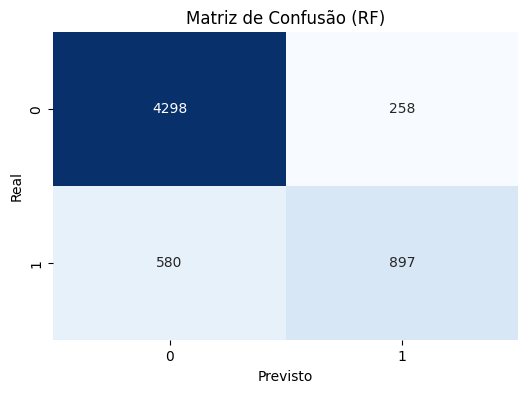

In [115]:
#Analisando as estatísticas e resultados do nosso modelo

print("\nRelatório de Classificação:")
print(classification_report(y_test, Ypred_RF))

# Matriz de Confusão da floresta aleatória
cm = confusion_matrix(y_test,Ypred_RF)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão (RF)')
plt.show()

# Rede Neural

c:\Users\pepol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:412: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)
c:\Users\pepol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


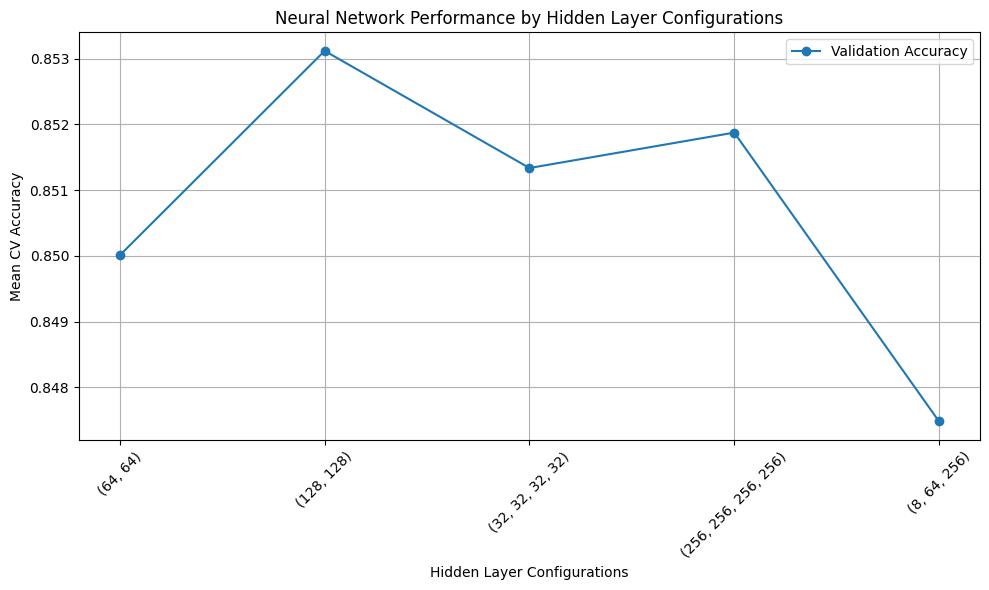

Best Parameters: {'hidden_layer_sizes': (128, 128), 'max_iter': 10, 'random_state': 123}
Best Cross-Validation Accuracy: 0.8531166458024216


In [116]:
# Treinamento do modelo de Rede Neural
from sklearn.neural_network import MLPClassifier

# Definição dos hiperparâmetros
hidden_layers = [(64,64), (128, 128), (32, 32, 32, 32), (256, 256, 256, 256), (8, 64, 256)]
epochs = [10] 
grid = {
    "hidden_layer_sizes": hidden_layers,
    "max_iter": epochs,
    "random_state": [123],
}

# Modelo de Rede Neural
ANN = MLPClassifier()

# Busca e otimização dos hiperparâmetros
grid_search = GridSearchCV(ANN, grid, cv=5, scoring="accuracy", n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

# Vizualização dos resultados obtidos
cv_results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(10, 6))
plt.plot(range(len(hidden_layers)), cv_results["mean_test_score"], marker="o", label="Validation Accuracy")
plt.xticks(range(len(hidden_layers)), [str(layers) for layers in hidden_layers], rotation=45)
plt.xlabel("Hidden Layer Configurations")
plt.ylabel("Mean CV Accuracy")
plt.title("Neural Network Performance by Hidden Layer Configurations")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Melhor configuração obtida
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


In [117]:
# Criando e Testando nosso modelo nos dados de treino
ANN = MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=10, random_state=123)

ANN.fit(X_train, y_train)
Ypred_ANN = ANN.predict(X_test)

Ypred_ANN

c:\Users\pepol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 1])


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4556
           1       0.74      0.60      0.66      1477

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.78      6033
weighted avg       0.84      0.85      0.84      6033



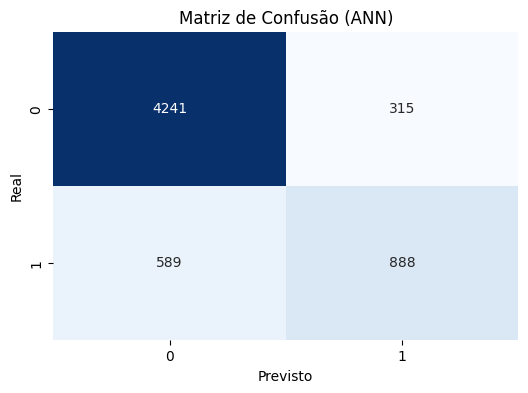

In [118]:
#Analisando as estatísticas e resultados do nosso modelo

print("\nRelatório de Classificação:")
print(classification_report(y_test, Ypred_ANN))

# Matriz de Confusão da rede neural
cm = confusion_matrix(y_test,Ypred_ANN)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão (ANN)')
plt.show()

# Support Vector Machines (SVM)

# Gerando dados de saída

In [119]:
adult_test_encoded[colunas_numericas] = scaler.transform(adult_test_encoded[colunas_numericas])

adult_test_encoded

,age,workclass,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,-1.023185,1,1.127842,0,1,-0.148500,-0.218601,0.256569,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1.946312,1,1.127842,1,1,-0.148500,-0.218601,0.339931,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.566339,1,1.520022,0,0,-0.148500,-0.218601,-0.076876,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.499634,1,-0.440877,0,1,-0.148500,-0.218601,-0.076876,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.946312,1,1.127842,1,1,-0.148500,-0.218601,0.756738,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,0.118929,1,-0.440877,1,1,-0.148500,-0.218601,-0.076876,0,0,...,0,0,0,0,0,0,0,0,0,0
16276,-0.642480,1,-0.440877,1,1,-0.148500,-0.218601,-0.076876,0,0,...,0,0,0,1,0,0,0,0,0,0
16277,-1.023185,1,-0.440877,0,1,-0.148500,-0.218601,-0.076876,0,1,...,0,0,0,0,0,0,0,0,0,0
16278,1.641748,1,1.520022,0,0,0.295572,-0.218601,-0.493683,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
knn = KNeighborsClassifier(n_neighbors=best_k)

knn.fit(X, Y)

output = knn.predict(adult_test_encoded)

In [121]:
rf = RandomForestClassifier(random_state=123)

rf.fit(X, Y)

output = rf.predict(adult_test_encoded)

In [122]:
saida = pd.DataFrame(({'Id':id_list, 'income':output}))
saida['income'] = saida['income'].apply(lambda x: '<=50K' if x==0 else '>50K')
saida

,Id,income
0,0,<=50K
1,1,>50K
2,2,<=50K
3,3,<=50K
4,4,>50K
...,...,...
16275,16275,<=50K
16276,16276,<=50K
16277,16277,<=50K
16278,16278,<=50K


In [123]:
saida.to_csv('submission.csv', index = False)